In [1]:
import pyautogui
import pandas as pd
import time
from utils import *
import pytesseract
import cv2
import screeninfo

In [2]:
df = pd.read_csv('coords.csv', sep=';')
# Zone craqueboule
df = df[(df.x!=7) | (df.y!=-24)]
df = df[(df.y<=-21) & (df.y>=-31) & (df.x<=8) & (df.x>=0) & (df.quantity>=2)].drop_duplicates(['x', 'y']).reset_index(drop=True)

In [3]:
df.shape

(17, 4)

#### Checker

In [4]:
def checker(coord):
    df =  pd.read_csv(f'coords/{coord}.csv', index_col=0)
    time.sleep(1.5)
    start = get_current_coordinates()
    print(start)
    go_to(start, coord)
    for i, row in df.iterrows():
        pyautogui.moveTo(row.x, row.y)
        time.sleep(1)

In [5]:
coord = [7, -25]
#print(df[(df.x==coord[0])&(df.y==coord[1])])
#checker(coord)

#### 1. Find the actual map position

- screenshot position + pytesseract OCR

In [6]:
start = get_current_coordinates()

#### 2. Find the shortest path

- Find shortest path

In [7]:
coords = df[['x', 'y']].to_numpy()
coords = [start]+[[x, y] for x,y in coords]
L = nearest_neighbor(coords)

- Visualize path

In [8]:
my_grid = grid(L)

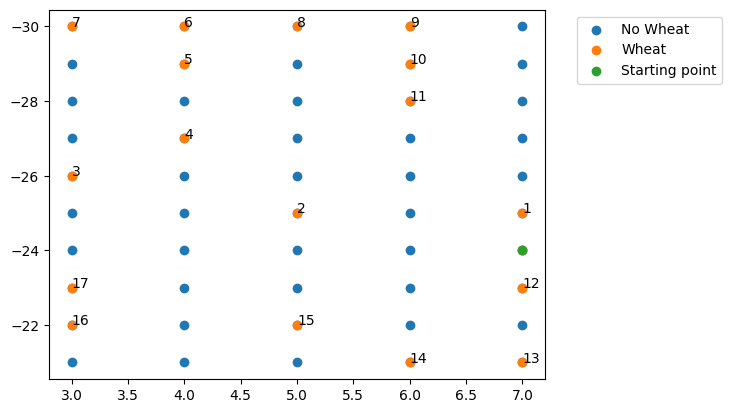

In [9]:
plot_grid(my_grid, L, start)

#### 3. Action when arrive at target

In [10]:
time.sleep(3)
screen = screen_map()
shape = np.array(screen).shape
# Define the x and y ranges
x = range(30, shape[1], 30)
y = range(30, shape[0], 40)
# Create the grid using meshgrid
X, Y = np.meshgrid(x, y)

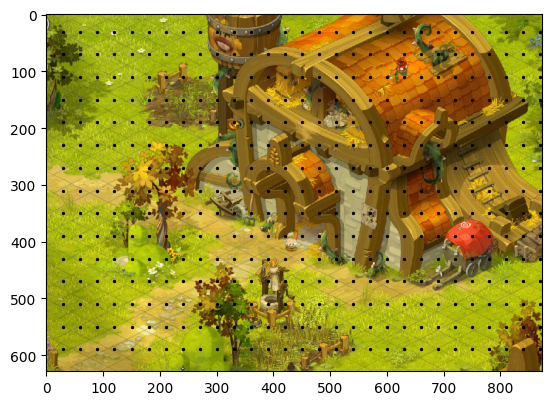

In [11]:
plt.imshow(np.array(screen))
plt.scatter(X, Y, s=2, color='black')
plt.show()

In [12]:
def create_grid(screen: Image):
    shape = np.array(screen).shape
    # Define the x and y ranges
    x = range(30, shape[1], 40)
    y = range(30, shape[0], 40)
    # Create the grid using meshgrid
    X, Y = np.meshgrid(x, y)
    return X, Y

def do_your_work():
    init = [204, 30]
    screen = screen_map()
    X, Y = create_grid(screen)
    coords = []
    for i in range(len(X)):
        for j in range(len(X[0])):
            a = i 
            b = (j if i%2==0 else len(X[0])- j - 1) 
            x, y = X[a, b]+ init[0], Y[a, b]+init[1]
            pyautogui.moveTo((x, y))
            time.sleep(0.3)
          
            black_box = get_crop_box()
            text = get_text_box(black_box).lower()
            if type(black_box)!= np.ndarray:
                black_box.close()
            if 'ble' in text or 'bie' in text:
                coords.append([x, y])
                if 'fauch' in text or 'puis' not in text:
                    pyautogui.click(button='left')
                    time.sleep(4)
    return coords
    

In [13]:
def check_those(df):
    for i, row in df.iterrows():
        pyautogui.moveTo((row.x, row.y))
        time.sleep(0.5)
        black_box = get_crop_box()
        if type(black_box)!= np.ndarray:
            black_box.close()
        text = get_text_box(black_box).lower()
        if 'ble' in text or 'bie' in text:
            if 'fauch' in text or 'puis' not in text:
                pyautogui.click(button='left')
                time.sleep(4)

#### 4. Move to wheat zones

In [14]:
# Test of go to
time.sleep(3)
i = 0
while(i<10):
    for coord in L[1:]:
        go_to(start, coord)
        start = coord
        print('Objective ARRIVED')
        try:
            cibles = pd.read_csv(f'coords/{coord}.csv', index_col=0)
            check_those(cibles)
        except:
            move_to((650, 350))
            coords = do_your_work()
            W = pd.DataFrame(coords, columns = ['x', 'y'])
            W.to_csv(f'coords/{coord}.csv')
            time.sleep(2)
    start = get_current_coordinates()
    coords = df[['x', 'y']].to_numpy()
    coords = [start]+[[x, y] for x,y in coords]
    L = nearest_neighbor(coords)
    i+=1

----------------------
0
37183
[7, -25]
Objective ARRIVED
----------------------
45277
[6, -25]
----------------------
33676
[5, -25]
Objective ARRIVED
----------------------
38081
[4, -25]
----------------------
35687
[3, -25]
----------------------
30580
[3, -26]
Objective ARRIVED
----------------------
41881
[4, -26]
----------------------
41507
[4, -27]
Objective ARRIVED
----------------------
42900
[4, -28]
----------------------
33903
[4, -29]
Objective ARRIVED
----------------------
0
0
[4, -29]
----------------------
37183
[5, -29]
----------------------
34449
[5, -28]
----------------------
35436
[5, -27]
----------------------
30580
[6, -27]
----------------------
42900
[6, -28]
----------------------
33676
[5, -28]
----------------------
33903
[5, -29]
----------------------
38081
[4, -29]
----------------------
123943
[4, -30]
Objective ARRIVED
----------------------
35687
[3, -30]
Objective ARRIVED
----------------------
41881
[4, -30]
----------------------
37183
[5, -30]

41507
[4, -27]
Objective ARRIVED
----------------------
42900
[4, -28]
----------------------
33903
[4, -29]
Objective ARRIVED
----------------------
123943
[4, -30]
Objective ARRIVED
----------------------
35687
[3, -30]
Objective ARRIVED
----------------------
41881
[4, -30]
----------------------
37183
[5, -30]
Objective ARRIVED
----------------------
30580
[6, -30]
Objective ARRIVED
----------------------
117721
[6, -29]
Objective ARRIVED
----------------------
34449
[6, -28]
Objective ARRIVED
Objective ARRIVED
----------------------
33903
[6, -29]
Objective ARRIVED
----------------------
123943
[6, -30]
Objective ARRIVED
----------------------
33676
[5, -30]
Objective ARRIVED
----------------------
38081
[4, -30]
Objective ARRIVED
----------------------
0
35687
[3, -30]
Objective ARRIVED
----------------------
41881
[4, -30]
----------------------
117721
[4, -29]
Objective ARRIVED
----------------------
34449
[4, -28]
----------------------
35436
[4, -27]
Objective ARRIVED
-------

IndexError: list index out of range